In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('t20-world-cup-22.csv')

Let's have a look at dataset

In [3]:
df.head()

,venue,team1,team2,stage,toss winner,toss decision,first innings score,first innings wickets,second innings score,second innings wickets,winner,won by,player of the match,top scorer,highest score,best bowler,best bowling figure
0,SCG,New Zealand,Australia,Super 12,Australia,Field,200.0,3.0,111.0,10.0,New Zealand,Runs,Devon Conway,Devon Conway,92.0,Tim Southee,3-6
1,Optus Stadium,Afghanistan,England,Super 12,England,Field,112.0,10.0,113.0,5.0,England,Wickets,Sam Curran,Ibrahim Zadran,32.0,Sam Curran,5-10
2,Blundstone Arena,Ireland,Sri lanka,Super 12,Ireland,Bat,128.0,8.0,133.0,1.0,Sri lanka,Wickets,Kusal Mendis,Kusal Mendis,68.0,Maheesh Theekshana,2-19
3,MCG,Pakistan,India,Super 12,India,Field,159.0,8.0,160.0,6.0,India,Wickets,Virat Kohli,Virat Kohli,82.0,Hardik Pandya,3-30
4,Blundstone Arena,Bangladesh,Netherlands,Super 12,Netherlands,Field,144.0,8.0,135.0,10.0,Bangladesh,Runs,Taskin Ahmed,Colin Ackermann,62.0,Taskin Ahmed,4-25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   venue                   33 non-null     object 
 1   team1                   33 non-null     object 
 2   team2                   33 non-null     object 
 3   stage                   33 non-null     object 
 4   toss winner             30 non-null     object 
 5   toss decision           30 non-null     object 
 6   first innings score     30 non-null     float64
 7   first innings wickets   30 non-null     float64
 8   second innings score    30 non-null     float64
 9   second innings wickets  30 non-null     float64
 10  winner                  29 non-null     object 
 11  won by                  29 non-null     object 
 12  player of the match     29 non-null     object 
 13  top scorer              30 non-null     object 
 14  highest score           30 non-null     floa

# Now let’s look at the number of matches won by each team in the world cup:

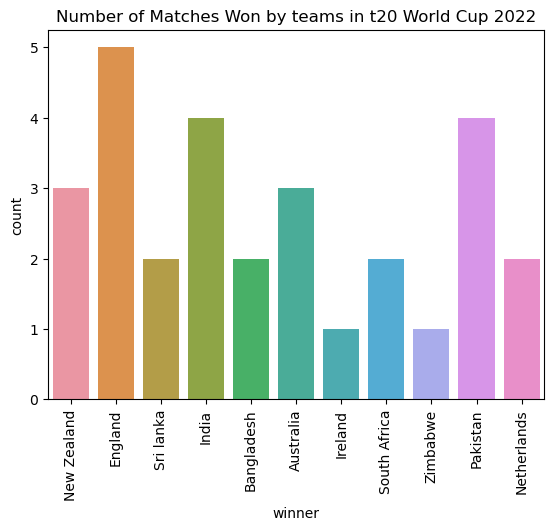

In [5]:
plt.title('Number of Matches Won by teams in t20 World Cup 2022')
sns.countplot(x=df['winner'])
plt.xticks(rotation=90)
plt.show()

As England won the t20 world cup 2022, England won five matches. And Both Pakistan and India won 4 matches

# Now let’s have a look at the number of matches won by batting first or second in the t20 world cup 2022:

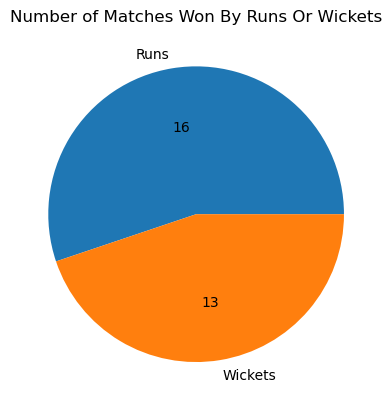

In [6]:
won_by = df["won by"].value_counts()
label = won_by.index
counts = won_by.values
total = sum(counts)
plt.title('Number of Matches Won By Runs Or Wickets')
plt.pie(counts,labels=label,autopct=lambda p: '{:.0f}'.format(p * total / 100))
plt.show()

So in the t20 world cup 2022, 16 matches were won by batting first, and 13 matches were won by chasing.

# Now, let’s have a look at the toss decisions by teams in the world cup:

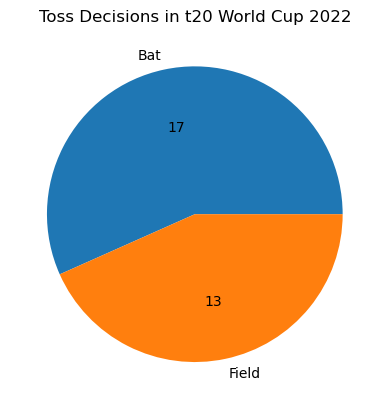

In [7]:
toss = df["toss decision"].value_counts()
label = toss.index
counts = toss.values
total = sum(counts)
plt.title('Toss Decisions in t20 World Cup 2022')
plt.pie(counts,labels=label,autopct=lambda p: '{:.0f}'.format(p * total / 100))
plt.show()

So in 17 matches, the teams decided to bat first, and in 13 matches, the teams chose to field first.

#  Now let’s have a look at the top scorers in the t20 world cup 2022:



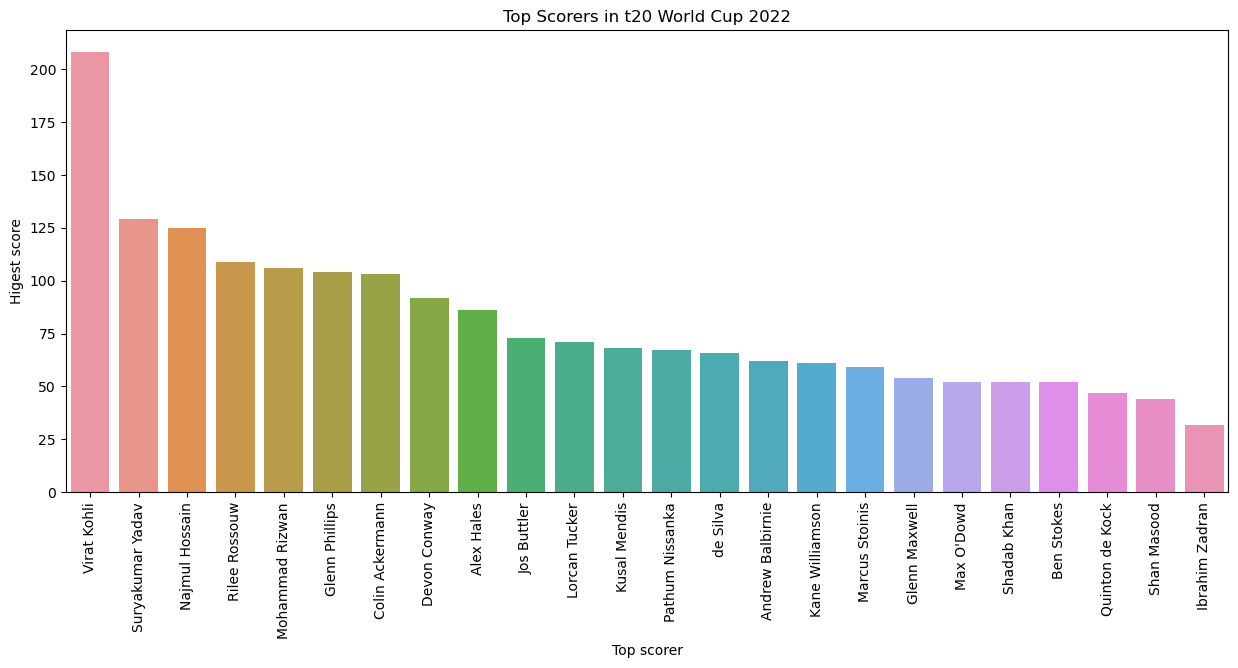

In [8]:
top_scorer=df.groupby('top scorer')['highest score'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,6))
plt.title('Top Scorers in t20 World Cup 2022')
sns.barplot(x=top_scorer.index,y=top_scorer.values)
plt.xlabel('Top scorer')
plt.ylabel('Higest score')
plt.xticks(rotation=90)
plt.show()

So, Virat Kohli scored the highest in 3 matches. Undoubtedly, he was the best batsman in the t20 world cup 2022

# Now let’s have a look at the number of player of the match awards in the world cup:



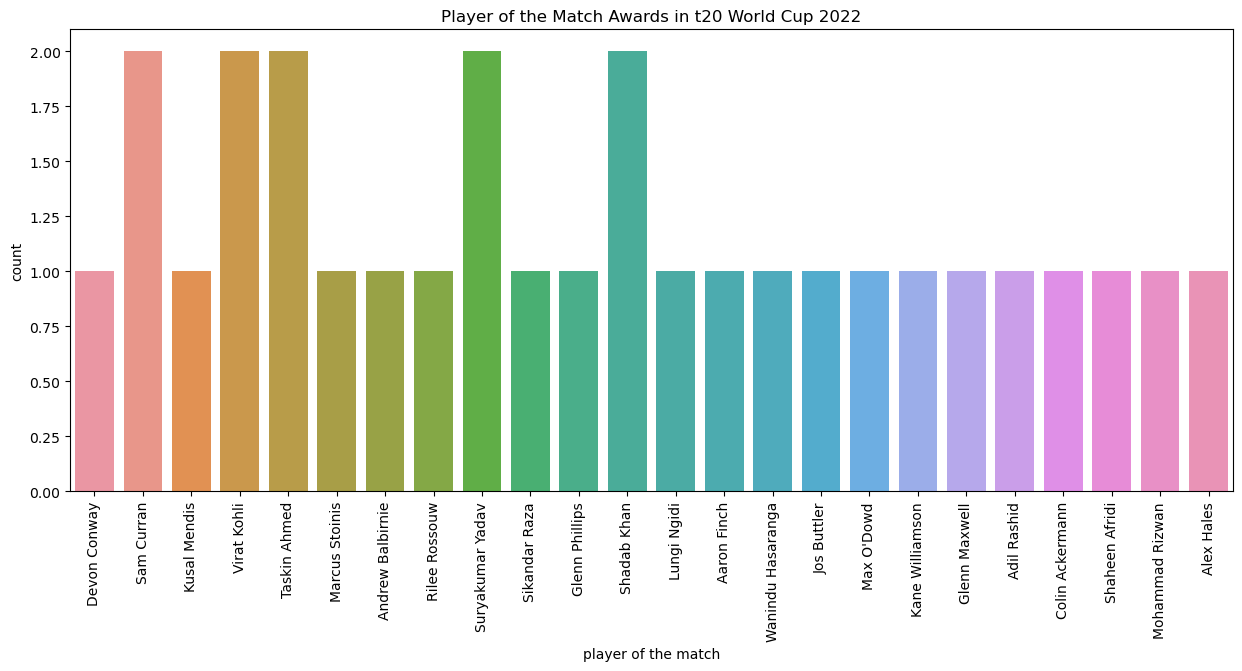

In [9]:
plt.figure(figsize=(15,6))
plt.title('Player of the Match Awards in t20 World Cup 2022')
sns.countplot(x=df['player of the match'])
plt.xticks(rotation=90)
plt.show()

Virat Kohli, Sam Curran, Taskin Ahmed, Suryakumar Yadav, and Shadab Khan got the player of the match in 2 matches. No player got the player of the match award in more than two matches.

# Now let’s have a look at the bowlers with the best bowling figures at the end of the matches:

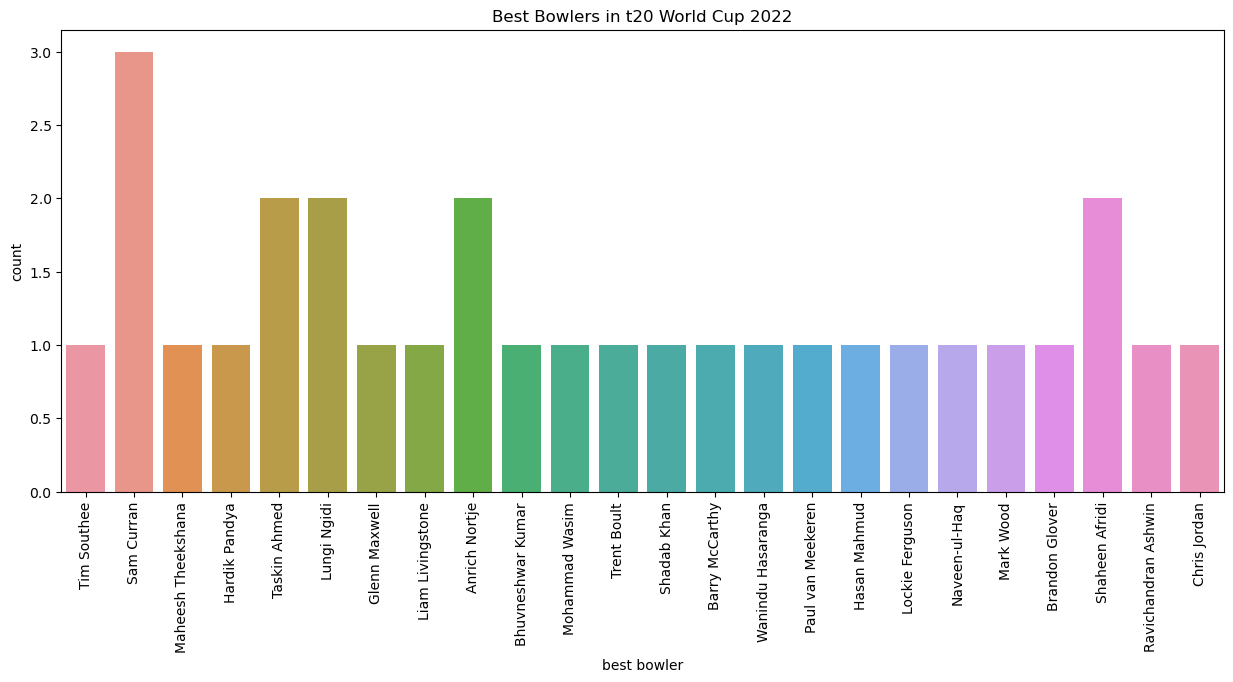

In [10]:
plt.figure(figsize=(15,6))
plt.title('Best Bowlers in t20 World Cup 2022')
sns.countplot(x=df['best bowler'])
plt.xticks(rotation=90)
plt.show()

Sam Curran was the only best bowler in 3 matches.

# Now let’s compare the runs scored in the first innings and second innings in every stadium of the t20 world cup 2022:

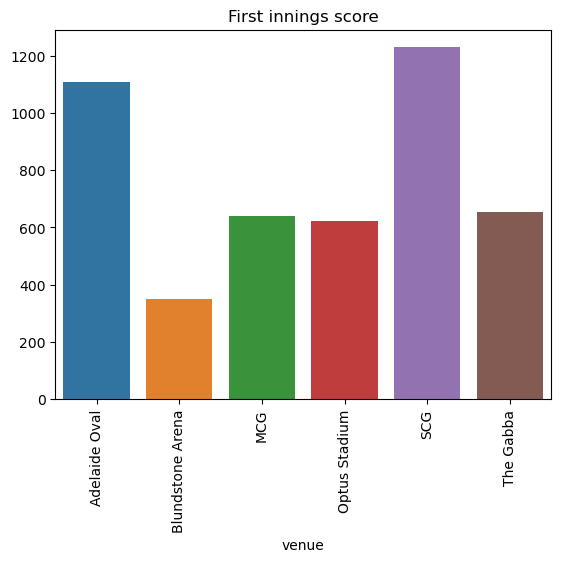

In [11]:
best_venue=df.groupby('venue')[['first innings score','second innings score']].sum()
labels = best_venue.index
values = best_venue.values
plt.title('First innings score')
sns.barplot(x=labels,y=values[:,0])
plt.xticks(rotation=90)
plt.show()

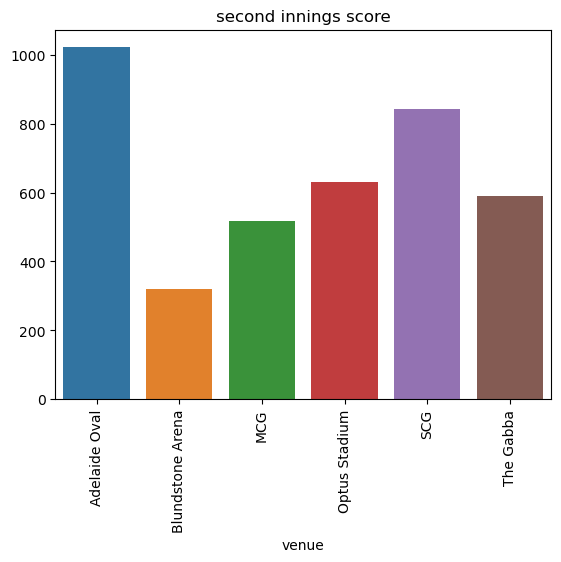

In [14]:
best_venue=df.groupby('venue')[['first innings score','second innings score']].sum()
labels = best_venue.index
values = best_venue.values[:,1]
plt.title('second innings score')
sns.barplot(y=values,x=labels)
plt.xticks(rotation=90)
plt.show()

So SCG was the only stadium in the world cup that was best for batting first. Other stadiums didn’t make much difference while batting first or chasing.

# Now let’s compare the number of wickets lost in the first innings and second innings in every stadium of the t20 world cup 2022:

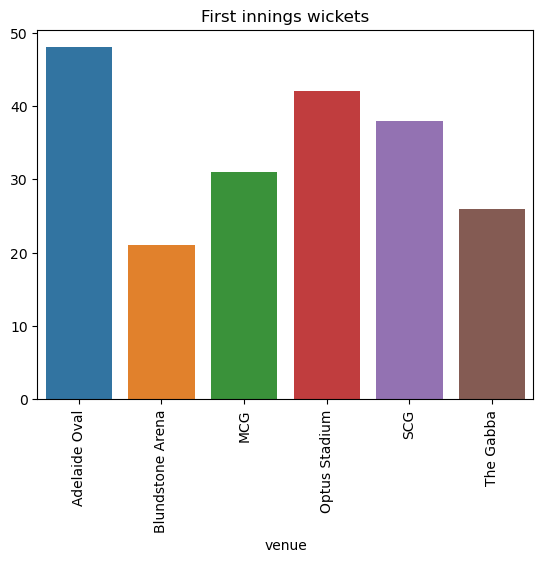

In [16]:
best_venue=df.groupby('venue')[['first innings wickets','second innings wickets']].sum()
labels = best_venue.index
values = best_venue.values
plt.title('First innings wickets')
sns.barplot(x=labels,y=values[:,0])
plt.xticks(rotation=90)
plt.show()

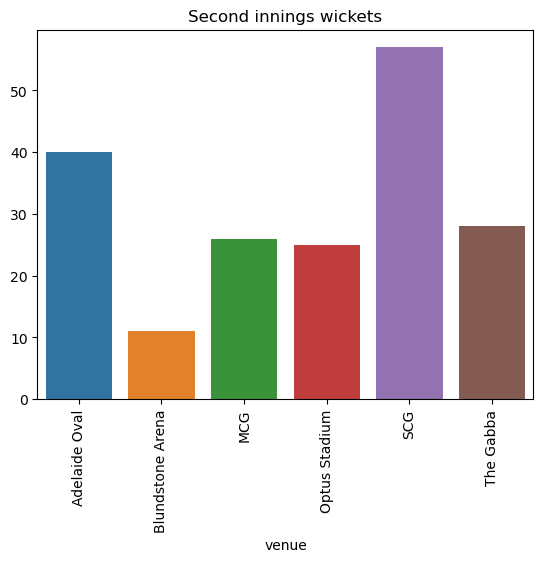

In [17]:
labels = best_venue.index
values = best_venue.values
plt.title('Second innings wickets')
sns.barplot(x=labels,y=values[:,1])
plt.xticks(rotation=90)
plt.show()

SCG was the best stadium to bowl while defending the target. While the Optus Stadium was the best stadium to bowl first.